Project Tasks:
* Regression discontinuity: banking recovery
* Graphical exploratory data analysis
* Statistical test: age vs. expected recovery amount
* Statistical test: sex vs. expected recovery amount
* Exploratory graphical analysis: recovery amount
* Statistical analysis: recovery amount
* Regression modeling: no threshold
* Regression modeling: adding true threshold
* Regression modeling: adjusting the window

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
data=pd.read_csv("bank_data.csv")

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [5]:
data.recovery_strategy.unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

point 1:Regression discontinuity: banking recovery

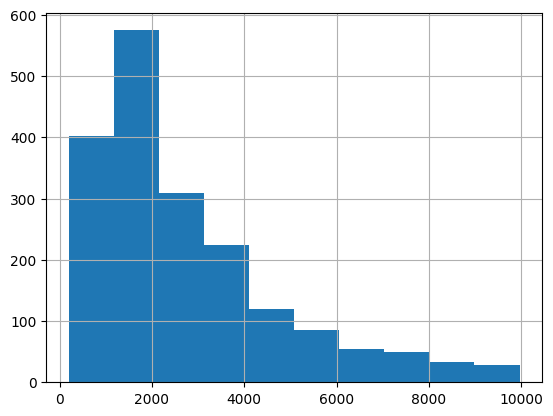

In [6]:
data.expected_recovery_amount.hist();

In [7]:
data.expected_recovery_amount.min()

194

Point 2:Graphical exploratory data analysis

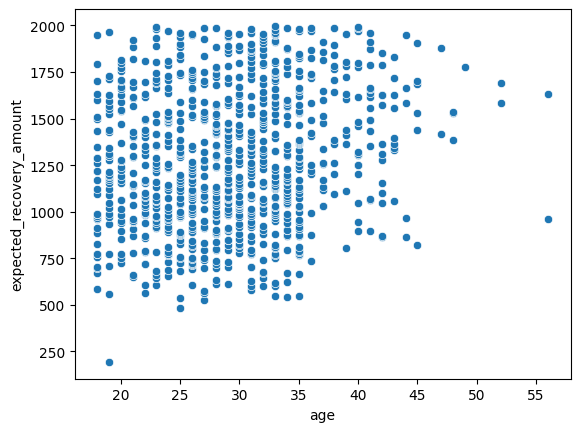

In [8]:
sns.scatterplot(y=data.expected_recovery_amount.loc[data['expected_recovery_amount']<2000],x=data.age);

in range level 0 to level 2 the age not affect on expected amount

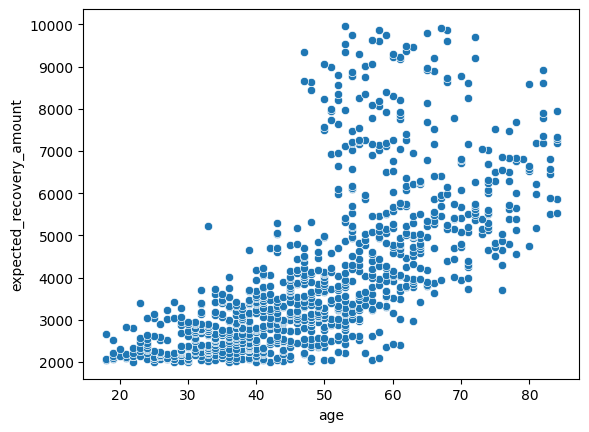

In [9]:
sns.scatterplot(y=data.expected_recovery_amount.loc[data['expected_recovery_amount']>2000],x=data.age);

the age affect in higher than 50

Point 3 :Statistical test: age vs. expected recovery amount

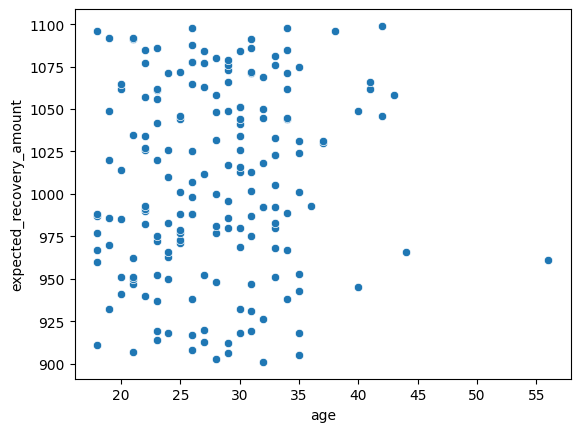

In [10]:
sns.scatterplot(y=data.expected_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100) ],x=data.age);

the age not affect in this range or expected_recovery_amount didn't depend on age

Point 4:Statistical test: sex vs. expected recovery amount

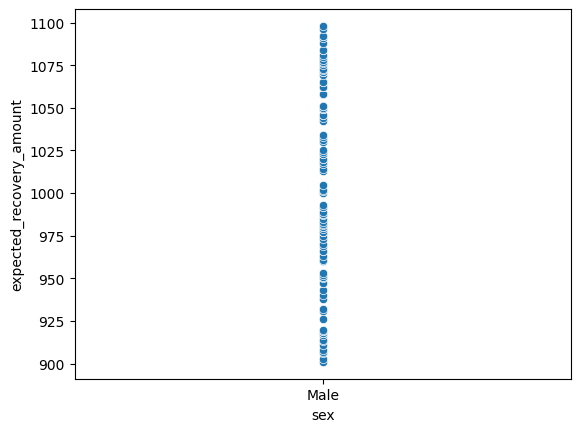

In [11]:
sns.scatterplot(y=data.expected_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100) ],x=data.sex.loc[data['sex']=='Male']);

from above :male was across thershold 1000

Point 5 :Exploratory graphical analysis: recovery amount

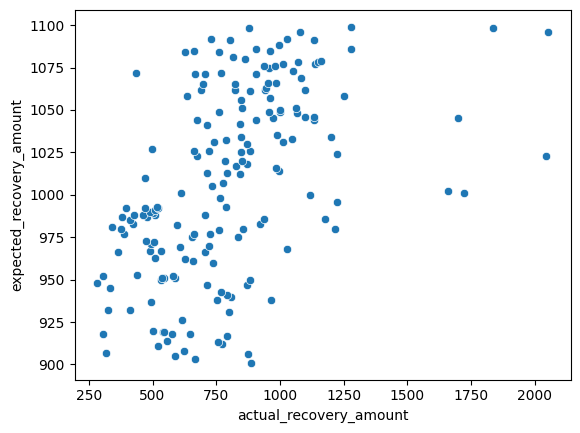

In [12]:
sns.scatterplot(y=data.expected_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100) ],x=data.actual_recovery_amount);

expected and actual in range 900 to 1100 ☝

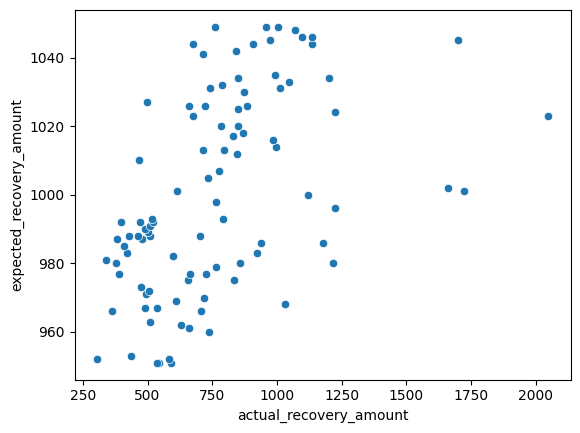

In [13]:
sns.scatterplot(y=data.expected_recovery_amount.loc[(data['expected_recovery_amount']>950) & (data['expected_recovery_amount']<1050) ],x=data.actual_recovery_amount);

Point 6 :Statistical analysis: recovery amount

In [14]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(data.actual_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100) ],data.actual_recovery_amount.loc[(data['expected_recovery_amount']>950) & (data['expected_recovery_amount']<1050) ])
result

KruskalResult(statistic=1.2480508142652285, pvalue=0.26392508797305225)

Point 7 :Regression modeling: no threshold

In [15]:
X=data[['expected_recovery_amount']]
y=data.actual_recovery_amount

In [16]:
from sklearn.linear_model import LinearRegression

model_1=LinearRegression()
model_1.fit(X,y)

LinearRegression()

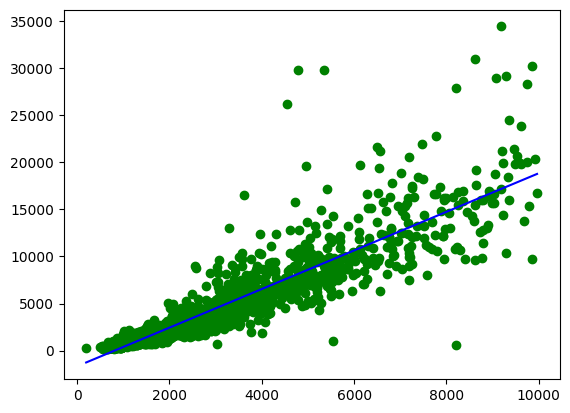

In [17]:
plt.scatter(x=data.expected_recovery_amount,y=data.actual_recovery_amount,c='green')
plt.plot(data.expected_recovery_amount,model_1.predict(X),c='blue');

it's a positive relation

Point 8 :Regression modeling: adding true threshold

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data.recovery_strategy=encoder.fit_transform(data.recovery_strategy)

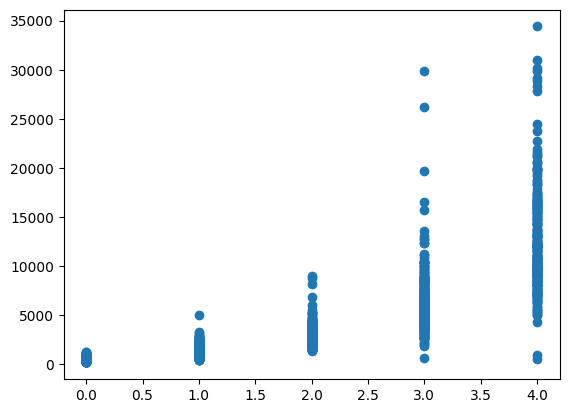

In [19]:
plt.scatter(data.recovery_strategy,data.actual_recovery_amount);

from above :the higher recovery strategy the higher actual amount

## model 2: with threshold




In [20]:
X=data.expected_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100)]
y=data.actual_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100) ]

In [21]:
model_2=LinearRegression()
model_2.fit(pd.DataFrame(X*X),y)

LinearRegression()

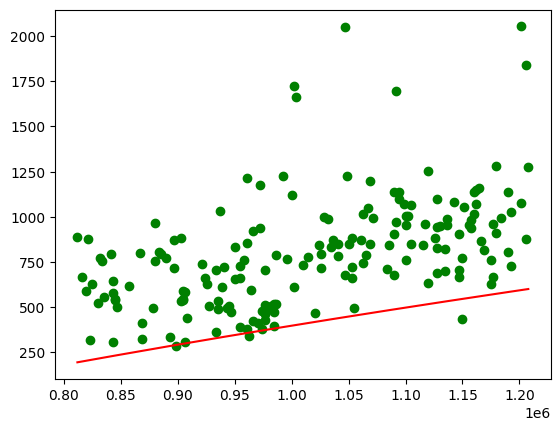

In [22]:
plt.scatter(x=X*X,y=y,c='green')
plt.plot(X*X,model_1.predict(pd.DataFrame(X)),c='red');

## model 3

In [23]:
X=data.expected_recovery_amount.loc[(data['expected_recovery_amount']>950) & (data['expected_recovery_amount']<1050)]
y=data.actual_recovery_amount.loc[(data['expected_recovery_amount']>950) & (data['expected_recovery_amount']<1050) ]

In [24]:
model_3=LinearRegression()
model_3.fit(pd.DataFrame(X*X),y)

LinearRegression()

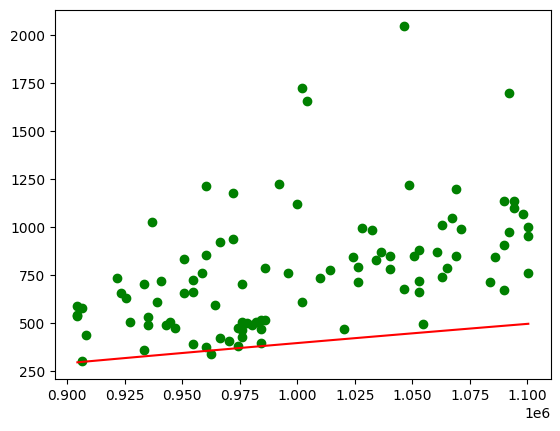

In [25]:
plt.scatter(x=X*X,y=y,c='green')
plt.plot(X*X,model_1.predict(pd.DataFrame(X)),c='red');